# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'/home/hendrix/projects/LanguageModel'

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
path = Path('/home/hendrix/data/jhlm/')
df = pd.read_csv(path/'alllessons3.csv')

In [33]:
path.ls()

[PosixPath('/home/hendrix/data/jhlm/alllessons.csv'),
 PosixPath('/home/hendrix/data/jhlm/data_save.pkl'),
 PosixPath('/home/hendrix/data/jhlm/jhlm3_lm.pkl'),
 PosixPath('/home/hendrix/data/jhlm/jhlm.pkl'),
 PosixPath('/home/hendrix/data/jhlm/tmp_lm'),
 PosixPath('/home/hendrix/data/jhlm/alllessons2.csv'),
 PosixPath('/home/hendrix/data/jhlm/alllessons3.csv'),
 PosixPath('/home/hendrix/data/jhlm/split'),
 PosixPath('/home/hendrix/data/jhlm/tmp_lm_small'),
 PosixPath('/home/hendrix/data/jhlm/excel'),
 PosixPath('/home/hendrix/data/jhlm/models'),
 PosixPath('/home/hendrix/data/jhlm/original'),
 PosixPath('/home/hendrix/data/jhlm/alllessons.xlsx'),
 PosixPath('/home/hendrix/data/jhlm/alllessons3.xlsx')]

# Data

In [5]:
df.head()

,okay so welcome practical deep learning for coders less than one it's kind of lesson two because there's a lesson zero in less than zero is is why do you need a GPU and how do you get it set up so if you haven't got the GPU running yet then go back and do that make sure that you can access a jupiter notebook and and then you're ready to start the real lesson one so if you're ready you will be able to see something like this and in particular hopefully you have gone to notebook tutorial it's
0,at the top that's right with zero zero here as...
1,Python before so nearly all of you that's grea...
2,really for the book audience not for you that'...
3,interactive experiments and it lets us give yo...
4,to speed where you can follow along it's desig...


In [34]:
data_lm = (TextList.from_csv(path, 'alllessons3.csv')
                .split_by_rand_pct(0.2)
                .label_for_lm()
                .databunch(bs=64))
data_lm.save('jhlm4_lm.pkl')

In [35]:
data_lm.show_batch()

idx,text
0,it it can have pictures you know it can have charts in it and most importantly it can have code in it okay so the code is in python how many people have used xxbos xxmaj python before so nearly all of you that 's great um if you have n't used xxmaj python that 's totally okay okay it 's a pretty easy language to pick up but
1,is coming from xxmaj chora last week we were correct it did come from xxmaj chora but actually we realized originally it came from xxmaj andrew earns excellent machine learning course on xxmaj coursera so apologies for the incorrect citation but in exchange let 's talk about xxmaj andrew owns excellent machine learning course on xxmaj coursera it 's it 's really great as you can see people gave
2,"is to classify movie reviews to be positive or negative . xxmaj so my hope was ( when i tried this last year ) that at that point , 25,000 ones and zeros would be enough feedback to fine - tune that model and it turned out it absolutely was . xxmaj yes , absolutely it does . xxmaj particularly if you start with your wikitext model and then"
3,zoom in a little bit we can double check because like yeah that looks pretty good they 're all kind of front right so we can click on here to go to selection mode and we can cut a grab a few and then you should check and so what we 're doing here is we 're trying to take advantage of the combination of human plus machine the
4,"screen and change its size , it 's doing bilinear interpolation . xxmaj so you can do that and then a stride 1 conv . xxmaj so that was what people were using , well , what people still tend to use . xxmaj that 's as much as i going to teach you this part . xxmaj in part 2 , we will actually learn xxbos what the"


# Training

## Train 1

In [36]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='jhlm4'),
                                           ShowGraph]).to_fp16()

In [37]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.272629,3.270892,0.357664,00:14
1,2.178835,0.790309,0.822276,00:14
2,0.842821,0.151224,0.973312,00:14
3,0.447837,0.092780,0.983242,00:14
4,0.297283,0.079701,0.984633,00:14
5,0.223380,0.074109,0.985228,00:14
6,0.169912,0.071610,0.985136,00:14
7,0.140390,0.069313,0.985451,00:14
8,0.129234,0.068196,0.985434,00:14
9,0.124652,0.068684,0.985211,00:14


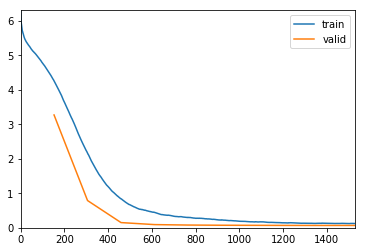

In [38]:
learn.fit_one_cycle(10,1e-2,moms=(.8,.7))

# predict

In [39]:
weights = path/'models'

In [40]:
weights.ls()

[PosixPath('/home/hendrix/data/jhlm/models/jhlm4_5.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm3_2.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm4_9.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm3_3.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm3_0.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm3_1.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/tmp.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm4_2.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm3_6.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/tmpg5a5a2er'),
 PosixPath('/home/hendrix/data/jhlm/models/big-1_0.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/tmp09lfbvmi'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm2_0.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm3_8.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm2_2.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm4_3.pth'),
 PosixPath('/home/hendrix/data/jhlm/models/jhlm4_0.pth'),
 PosixPath('/home/

In [41]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='jhlm4'),
                                           ShowGraph])

# lm4

In [47]:
learn.load(weights/'jhlm4_1');

## beam search

In [48]:
learn.beam_search('this is really cool',50,temperature=.3)

'this is really cool that it was created by you know some Western European and American person they almost certainly used Latin one so if you just papi an encoding equals Latin one if you use file open in Python or pandas open or whatever that will generally'

In [49]:
learn.beam_search('this is really cool',50,temperature=.4)

'this is really cool and very likely it was created by you know some Western European or English person they almost certainly used Latin one so if you just papi an encoding equals Latin one if you use file open in Python or pandas open or whatever that'

In [50]:
learn.beam_search('this is really cool',50,temperature=.5)

"this is really cool . What we want to start is going to look at text classification . We 're going to start with a pre - trained model which is called a language model . a language model is a model that learns to predict a pre - trained model which"

In [53]:
learn.beam_search('this is really cool',50,temperature=.9)

"this is really cool . We 're going to start with a pre - trained model which 's called a language model . a language model is a model that learns to predict the next word of a sentence . To predict the next word of a sentence , you actually have"

In [54]:
learn.beam_search('this is really cool',50,temperature=.99)

"this is really cool . It 's a dumb way to do it for a couple of reasons . One is that , have a look at the shaded area on the left , nearly all of those pixels are black - and - white . They 're nearly all zeros"

In [55]:
learn.beam_search('learning rate',50,temperature=.99)

"learning rate for Jupiter notebook it 's a really nice result from Simon Ellison and Natalie down they created a cougar or not web application over the weekend and won the science sex Day award in San Francisco and so i think trying to figure"

In [56]:
learn.beam_search('learning rate',50,temperature=.99)

'learning rate so this part of the model we might give a learning rate of 1e neg 5 and this part of the model we might give a learning rate of 1e 3c for the early layers so this part of the model we might give a learning rate of what is'

## beam size

In [57]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=100)

"this is really cool . We 're going to start with a pre - trained model that 's going to create a pre - trained model that 's going to do something else . We 're going to start with a pre - trained model . We 're going to do"

In [58]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=1000)

'this is really cool that it was created by you know some Western European and American person they almost almost certainly used Latin one so if you just papi an encoding equals Latin one if you use file open in Python or pandas open or whatever that will'

In [60]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=2000)

'this is really cool Henri Pollachi discovered that he can recognize with 85 % accuracy which of 110 City sorry which with 110 countries a satellite image is of which you can recognize with 85 % accuracy which of 110 City sorry which with 110 countries a satellite image is'

In [62]:
learn.beam_search('this is really cool',100,temperature=.4, beam_sz=2000)

"this is really cool . We 're going to do the same thing for segmentation . We 're going to start with a pre - trained model that 's going to do something else . We 're going to start with a pre - trained model that 's going to do something called segmentation . We 're going to start with a pre - trained model that 's going to do something other . We 're going to start with a pre - trained model which is called a language model . a language model is a a language"

In [63]:
learn.beam_search('this is really cool',50,temperature=1, beam_sz=1)

"this is really cool and like if you do something else it 's a bit that 's pretty cool it 's it 's a lot like a few years ago but it 's also known as a skip buses and a neural net ok so the only thing that we that is that this"

In [64]:
learn.beam_search('this is really cool',50,temperature=1, beam_sz=1)

"this is really cool because it 's like a cool question if you have a project you can then go to Jupiter notebook and you 'll get the documentation to get it to get your own notebooks random images so that you can click on Jupiter notebook and it 's going to"

In [65]:
learn.beam_search('this is really cool',50,temperature=1, beam_sz=1)

'this is really cool . It \'s interesting . What we \'re going to do is look at a picture at this point , we \'re going to look at some picture to make this picture a xxbos " this really interesting work was the first one we \'re going to look'

In [66]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=1)

"this is really cool and very experimental . It 's like the other example . We have a very specific understanding of how to use these neural nets to do this . But it 's interesting because we 've got to start with a pre pre trained model that 's not"

In [67]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=1)

"this is really cool . It 's literally the most mature style of coding it 's that it 's not that there are no really rules in the world that it 's really good at recognizing the hard problem that 's pretty good so the Second San Francisco study for"

In [68]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=10)

"this is really cool . We 're going to do something else . We 're going to start with a pre - trained model which is called a language model . a language model is a model that learns to predict the next word of a sentence . Language model is"

In [69]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=10)

"this is really cool . We 're going to start with a pre - trained model which is called a language model . a language model is a model that learns to predict the next word of a sentence . To predict the next word of a sentence , we do n't"

In [70]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=10)

"learning rate for you and so this is not part of a neural net this is just like some input matrix multiply non - linearity matrix model play non - linearity okay we 're always going to do the same thing for movies and so here 's the matrix product of these"

In [71]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=10)

"learning rate of 0.5 what 's going on here . We 're going to start with a pre - trained model which is called a language model which is called a language model . a a language model is a model that learns to predict the next word of a sentence"

In [72]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=10)

"learning rate okay so we 're going to do the same thing for movie reviews . We 're going to start with a pre trained model which is called a language model is a model that learns to predict things in the next word of a sentence . So first"

In [73]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate okay so that 's what we 're going to do when we do n't understand the problem of learning rates if you have n't studied this last lesson one in PI and this is a fast AI this is the fast a i might be able to do"

In [74]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate to do something things for you so if you go to dark start fast AI this is the fast a i 'm going to do some of the stuff we 're going to do you have to make sure you to get a list of all of the urls"

In [75]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

'learning rate times okay so we \'re going to start with a big list of them and so new to the that we \'re going to do something else to make them sense that these are the steps that we created so that would be " xxbos " of start with zero'

In [76]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate times grad okay so the basic idea is that you can just pass it in here and go and have a look at the data set we 'll create we 're going to start with some path we 're going to learn some some path along the path and some"

In [77]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate okay so we 're going to start with some new applications we 're going to start with we 're going to start with some new vision which is going to be a more sophisticated you know these are going to do something very similar to what we 're doing but"

In [78]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is something which is called to create a learner for a convolutional neural network and it 's the same as a neural net that you can write it up and so forth and so it 's like okay that 's what a normal neural fully connected neural net is you know"

In [79]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is a really common piece of kind of thinking about seeing the sounds of the month so i do n't know if this is going to be a really it 's not that representative of how it would work but it 's it 's a lot of people have this specific"

In [80]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is something called by default and basically it 's a resnet 34 which is not a resnet resnet , it 's not dramatically larger but complex enough that it 's actually called a resnet densenet , it 's called a densenet . And like Densenet these are built a"

In [81]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is a really nice language for most of the text we use for movies . We 're not really there it 's very important to study a language model is a very useful model that is used in this language model . And it 's a language model of"

In [82]:
learn.beam_search('google',50,temperature=1, beam_sz=1)

"google is something that actually grabs the whole bunch of images and different labels of all of the videos so it 's really nice to see the images are not so i it 's really interesting because it turns out that it 's it 's it 's it 's giving a"

In [83]:
learn.beam_search('google',50,temperature=1, beam_sz=1)

"google for movies it 's not going to appear at all as a a recurrent neural net but instead this is a little bit different back the next CNN and this is actually a pre - trained model that we 're using in a very interesting way to study them"

In [84]:
learn.beam_search('google',50,temperature=1, beam_sz=1)

"google of this week i just created my data bunch so i can that for my training for the language model , we 're not using this language model because it 's not that we 're doing it 's not Python it 's not that there are no rules in"

## predict

In [85]:
learn.predict('this is really cool',50,temperature=.3, )

"this is really cool . It 's a really cool challenge . It 's really cool . We have a whole bunch of different approaches we 're going to do some different computation for it but we 're not going to do it in a very interesting way . We"

In [86]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool for deep learning because it 's click on square brackets something now that you know you know exactly what median values are and how do we weigh it up and so forth . Basically it 's a dumb way to do it for a couple of reasons ."

In [87]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool because if you think about it it 's not just a pre - trained model that 's called but that 's not saying hey it 's a slash it 's a very fast AI better if you noticed like egg enter the something like this or need interesting documentation"

In [88]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool and common like it 's particularly hard to see that these bits of code tend to be for real - world data sets it 's extremely easy for you to build a sentient brain but that 's pretty interesting and you need to see it again and make sure that"

In [89]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool and very experimental when you see you do segmentation things with deep learning largely through these very readily but for now over half a few papers you know some kind of facial coding and abbreviations examples of your segmented neural networks and they 'll appear on the screen they 're"

In [90]:
learn.predict('learning rate',50,temperature=1, min_p=.1)

"learning rate finder okay so the first question then is what kind of data do you want to use so that you can see that 's where it 's going to grab the planet and then we 're going to take the log and that 's going to be the same number"

In [91]:
learn.predict('learning rate',50,temperature=1, min_p=.01)

"learning rate okay so we 've got a little bit of coding and a bunch of classes to be like everything else so what is the trick - a few things do we have to do the same thing for segmentation we 're going to take the log of y and then"

In [92]:
learn.predict('learning rate',50,temperature=1, min_p=.01)

"learning rate finder parameters that are used by multiplying them by activations okay so it 's kind of like we 're doing the same thing for movies but if it 's similar to the matrix multiplications play one of those weight matrices that 's the same as a linear function so this"

In [93]:
learn.predict('learning rate',50,temperature=1, min_p=.01)

"learning rate times learning rate rate finder first or those activations i think that the learning rate for the early layers is smaller it 's going to move them around less because we think it was already pretty easy they needed a lot to build a model which can see what the"

In [94]:
learn.predict('google',50,temperature=1, min_p=.01)

'google for some symbol we throw away some activation so if it is a resnet function you can replace it with some 4x4 and throw away some percentage of the input so that would grab the middle bit and it will add that learning rate and that would change the meaning'

In [95]:
learn.predict('google',50,temperature=1, min_p=.01)

"google of them and then go back to here so we can run this cell and so we need a quick overview of how to create a data set using Google images so this is a little minimal thing we 'll learn about is a number of pictures of pictures"

In [96]:
learn.predict('google',50,temperature=1, min_p=.01)

"google of them have to be in a single folder and i 're actually not going to create a special version of them but it 's the same basic idea for image classification that you could recognize with this idea this is a really nice idea for something very similar to"

In [97]:
learn.predict('google',50,temperature=1, min_p=.01)

"google okay so now we 're going to do some computation and then we 're going to start with a pre trained model which means that we can use that to decide what normalization do you want to use if you 're wanting to transfer learning rates in fast AI"

In [98]:
learn.predict('google',50,temperature=1, min_p=.01)

"google provides a really great way to study them so let 's try that let 's try that let 's try that let 's try one try try let 's try one cycle and try and try a little bit quickly and try and do the best one we 're doing"

In [99]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google is a really common function for image classification and it 's an element - wise function so it 's a function that is applied to each input element of an input when it 's a input and that when it 's a function that is applied to each input element"

In [100]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google of them and then we 'll learn more about the specifics of these bits of code but for now we 've just got a list of all of the labels and so forth and so that 's what we 're using for planet okay so we 're going to take"

In [101]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google okay so this is the first time this has been shown before so i 've got my black bears URL so i can see like this one i 've got three different xxbos it 's so common right if you want to figure out how to do a good"

In [102]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google okay so let 's grab the first AI library and let 's start with black bears i 've already got my black bears URL so i click on this cell for black bears and i 'll run it so i 'll run this cell and so i can"

In [103]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google . What a waste of time , what a waste of computation . There 's a few tricks in this case , some of which he says is . But it 's interesting . He describes in quite a bit of detail about the architecture that"

In [104]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google okay so just like we can do that and then we can take a look at the data inside and so forth so we 're going to be learning exactly what that means and then we 're going to go back to the previous AI and choose open"

In [105]:
learn.predict('google',50,temperature=.5, min_p=.01)

"google okay so what i do is i want to mention this idea of embedding matrices and so forth so i can create an embedding matrix and so i have to create a simple mini batch size of the input because that 's what i always does so i do n't"

In [106]:
learn.predict('google',50,temperature=.8, min_p=.01)

"google okay so this is the first time this has actually got a whole bunch of pictures that i created so i 've got a list of image files that are in a folder and they 're labeled according to the folder name that they 're in trainer validation you can"

In [107]:
learn.predict('google',50,temperature=.8, min_p=.01)

"google . What a waste of time , what a waste of computation . There 's a few choices to make this simple resnet conv what we 're doing with this new resnet . As we described , it takes the same back as i hoped to build"

In [108]:
learn.predict('google',50,temperature=.8, min_p=.01)

"google . So what i do is we replace the resnet 34 by default with this new resnet architecture , and now the original pixels are the same color and so forth . So you can see that this resnet , they 're literally the same basic structure ."

In [109]:
learn.predict('google',50,temperature=.8, min_p=.01)

"google has and we 've been getting some transforms here and so the first thing we have is one sequence in real life that 's almost never the case normally we 've certainly had a bunch of metadata here that we had earlier we can give a validation set of classes"

## predict2

In [114]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=1) for i in range(len(TEXTS))))

1. xxbos Amazingly things have been really helpful if you have n't used : python " is used to do this function is that no founder of some form of something called a resnet nonlinearities﹣particularly has a mathematical property called c and that is called column size transforms first of all

2. the output of the input competitors of those and so what i do is i start with the matrix multiplied by a one hot encoded matrix and so this is a nice trained version of this function that is applied to all of these activations and then this makes me just

3. this is one of the steepest gradients i would like okay now we can call it with this token called a " a easily enough to calls it with the same name so here it is so let 's just say this is very designed so we just created some kind

4. when you create your own Panama bus detector into that we have to deal with that noise and then decide how to create a sentient brain but something okay Yeah little dated yeah how do we do that and we can rep

In [115]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.8) for i in range(len(TEXTS))))

1. xxbos It 's the basic idea is that this is a resnet 34 and this is literally the same usual linear model concept from a neural net that you have to make . So in this case , a neural net has to do the same basic steps .

2. the labels refer to the thing we 're about to see them in our computer you can see in the documentation these are the file names of the folder and is the thing that actually turns them into piped watch data sets this is the " Teddy 's finder is

3. this year i 'm not going to tell you about some of the details we 've learned about some people playing cricket and so we can learn how to do the useful thing for extracting learning but because the learning rate for the early layers is smaller it 's going to

4. when you know this is a cat or a cat you know sometimes that results from law is a very interesting device in our house . So i keep guessing it 's probably a trick because if you have n't used an older style before it 's possible that you

5. i really want to c

In [119]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.5) for i in range(len(TEXTS))))

1. xxbos " really likely it was created by you know some Western European or American person they almost certainly used Latin one so if you just papi an encoding equals Latin one if you use file open in Python or pandas open or whatever that

2. the names URL file name destination that you can write it using the pandas library if you have n't used pandas before it 's kind of the standard way of dealing with tabular data in in Python pretty much always appears on the PD namespace in this case

3. this week i 've got the same set of activations here so i can go through it slowly okay so it 's a really nice challenge to try and run a cell and so the idea is that you can just experiment to do a lot more quickly with paid watch

4. when you do n't know if you have n't used some GPU this will be used to seeing them but sometimes it 's not it 's kind of obvious it 's not it 's much like anything like this it 's not it 's much like some kind of coded

5. i really want to save the whole thing f

In [120]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=.3) for i in range(len(TEXTS))))

1. xxbos " can go through the data block API and say okay we 've got a list of image files that are in a folder we need to create a validation set to create our data bunch so that 's what we 're using for planet okay so we 're

2. the names URL file name destination that you can actually open up a notebook and you can just pass it in there and it 's going to download the data and say okay it 's not going to be an import matrix multiply non - linearity matrix multiply non -

3. this case i 've been mentioning for a while that we 're going to look at some new vision for NLP and so i think that 's pretty cool because it 's it 's it 's it 's it 's it 's it 's giving a different learning rate to

4. when you 're using transfer learning if you have n't studied the keyboard shortcut you can run it in the air so this is a really nice function that we 'll see in the workplace and that would give us a better result and it 's also going to provide a

5. i really want to mention the idea of watchi

# lm3

In [29]:
learn.load(weights/'jhlm3_9');

## beam search

In [16]:
learn.beam_search('this is really cool',50,temperature=.3)

"this is really cool if you want to predict things there 's no point predicting things that are in the middle of your training set you want to predict things in the future another interesting thing about it is the evaluation metric they provided is the root mean squared percent error so this is"

In [17]:
learn.beam_search('this is really cool',50,temperature=.4)

"this is really cool that you can do this kind of stuff either in plant or in browser nowadays Henri plushie is built your city from space which he describes as creepy how accurate it is so here 's why i live which it figured out was in the United States"

In [18]:
learn.beam_search('this is really cool',50,temperature=.5)

"this is really cool . If you have a , let 's say , 2x2 input with these are your pixel values ( a , b , c , d ) and you want to create a 4x4 , why not just do this ? So i 've now up scaled from"

In [22]:
learn.beam_search('this is really cool',50,temperature=.9)

"this is really cool . If you look at the definition of res_block in the fast.ai code , you 'll see it looks a little bit different to this , and that 's because i 've created something called a mergelayer . a mergelayer is something which in the forward ( just skip"

In [25]:
learn.beam_search('this is really cool',50,temperature=.99)

"this is really cool because as i mentioned before the evaluation metric is root mean squared percentage error and first i 'd either fastener iron or PI torch has a root mean squared percentage error loss function built in i do n't even know if such a loss function would work super well"

In [26]:
learn.beam_search('learning rate',50,temperature=.99)

"learning rate it can kick it out right it could actually make it worse which we really do n't want to happen okay so this this process is called using discriminative learning rates you wo n't find much online about it because i think we were kind of the first to use"

In [28]:
learn.beam_search('learning rate',50,temperature=.99)

'learning rate do useful things through creating software to make deep learning easier to use at a very high level through education such as the thing you are watching now through research which is where we spend a very large amount of our time which is researching to figure out how can'

In [30]:
learn.beam_search('this is really cool',50,temperature=.3)

"this is really cool to be - a into more different my they religions given interesting 1 happens data why so it we a really good vs. to list and do well they a clever activations data 've so this one the exploit data 've is if on set got were variable 100k ."

## beam size

In [29]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=100)

"this is really cool . If you have a , let 's say , 2x2 input with these are your pixel values ( a , b , c , d ) and you want to create a 4x4 , why not just do this ? So i 've now up scaled from"

In [30]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=1000)

"this is really cool . If we compare it to last year 's state of the art on imdb , this is from The cove paper from mccann et al . at Salesforce Research . Their paper was 91.8 % accurate . And the best paper they could"

In [31]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=1000)

"this is really cool . If you have a , let 's say , 2x2 input with these are your pixel values ( a , b , c , d ) and you want to create a 4x4 , why not just do this ? So i 've now up scaled from"

In [33]:
learn.beam_search('this is really cool',50,temperature=.3, beam_sz=2000)

"this is really cool that you can do this with what i 've learned it can also be intimidating intimidating to think like wow these people are doing amazing things but it 's important to realize that as a thousands of people during this course you know i 'm just picking out the kind"

In [37]:
learn.beam_search('this is really cool',50,temperature=.4, beam_sz=2000)

"this is really cool because it 's pretty intimidating to put yourself out there and say like i 'm new to all this but here 's what i 've done and so example four things i thought was really interesting was figuring out who 's talking is it Ben Affleck or"

In [39]:
learn.beam_search('this is really cool',100,temperature=.4, beam_sz=2000)

"this is really cool . If you have a , let 's say , 2x2 input with these are your pixel values ( a , b , c , d ) and you want to create a 4x4 , why not just do this ? So i 've now up scaled from 2 by 2 to 4 by 4 . i have n't done any interesting computation , but now on top of that , i could just do a stride 1 convolution , and now i have done some computation . An upsample , this is called nearest neighbor interpolation"

In [52]:
learn.beam_search('this is really cool',50,temperature=1, beam_sz=1)

'this is really cool and really nice to Simon Ellison and Natalie down they created a cougar or not web app which talks to a PI torch model so examples of web apps people have built during the week Edward Ross built the what car is that'

In [55]:
learn.beam_search('this is really cool',50,temperature=1, beam_sz=1)

"this is really cool that you can do this kind of stuff either in plant or in browser nowadays Henri plushie is built your city from space which he describes as creepy how accurate it is so here 's why i live which it 's going to take you a long way it"

In [56]:
learn.beam_search('this is really cool',50,temperature=1, beam_sz=1)

"this is really cool that if can do with this to do something for your particular application you would then go you know to you can see out how to do something for your particular application you would then go you know to look at text and vision and so forth and that 's"

In [59]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=1)

"this is really cool because it can kind of fade up a bit of a lot of naysayers for this lesson one but if you 're not learning about you can see out this part of the model and it 's going to be a lot of material okay but if you 're not"

In [65]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=1)

'this is really cool because there \'s a much a difference between Wikipedia and random words than there is between like Wikipedia and reddit . So it kind of gets you xxbos " the most famous academic data set for object detection we can create we create DATA set from'

In [67]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=10)

"this is really cool . How do you do computation which increases the grid size ? Well , we do n't have a way to do that in our current bag of tricks . We can use a stride one conv to do computation and keeps grid size or a stride"

In [72]:
learn.beam_search('this is really cool',50,temperature=.8, beam_sz=10)

"this is really cool . If we compare it to last year 's state of the art on imdb , this is from The cove paper from mccann et al . at Salesforce Research . Their paper was 91.8 % accurate . And the best paper they could"

In [73]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=10)

"learning rate finder graph yeah i mean it 's a great question yeah i mean the short answer is no is because this is still a bit more artisinal than i would like you know as you can kind of see i 've been kind of saying how i read this learning"

In [74]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=10)

"learning rate okay so if you go seven times to a bunch of times then you end up with something that 's a good size yeah all of these details we are going to we are going to get to but the key thing is i wanted to get you training a"

In [75]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=10)

"learning rate for the first layer group one in egg four for the second one day neck three for the third so now if you go back and look at the way that we 're training hopefully you 'll see that this makes a lot of sense this divided by three thing"

In [79]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate okay so now you can have a model called the data bunch and we can grab a batch of data at random and use that to decide what normalization stats to use . That 's a good good idea if you 're not using a pre - trained model"

In [80]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate finder are you know it 's a bit of learning rates and so it 's a bit more artisinal than i would like you know as you can kind of see i 've been kind of saying how i read this learning rate graph depends a bit on what stage"

In [81]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate times the same thing again you 've got an accuracy threshold point - i 've got a f beta threshold point - i can pass them both in his metrics and i can then go those two steps together just in a single number and that is called the accuracy"

In [82]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

'learning rate times parameters i \'ve got a new capability i did n\'t have before and i kind of get to see a lot of the kind of tradecraft of xxbos " the most famous academic data set for object detection we can create it using the same process grab a list'

In [84]:
learn.beam_search('learning rate',50,temperature=1, beam_sz=1)

"learning rate okay so this is going to be a bit of data we 're going to learn about shortly and what does it mean to normalize the images so normalizing the images we 're going to be learning more about later in the course but in short it means that the"

In [85]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is that there are 37 possible categories and so one thing to the other is that the classes that we want to create is the main reason i mentioned this for you is that so that you can now click the download button and it 'll download the predictions which is"

In [86]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is the story of kate ' , ' ( potente ) , an intensely unlikeable bourgeois bitch that finds herself somehow sleeping through the noise of the last been done before but there is something about the way its done here that lifts it up from the rest of the pack"

In [87]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

"google is that there are no really important topics in the building that are seen so far because there 's lots of places where you have to pass in functions and you very often want to pass in a slightly customized version of a function so that here 's how you do"

In [88]:
learn.beam_search('google is',50,temperature=1, beam_sz=1)

'google is that there is kind of a data set called cambered which we can download and they have already got a whole bunch of images and segment masks prepared for us which is pretty cool and remember pretty much all of the data sets that we have provided kind of inbuilt'

In [89]:
learn.beam_search('google',50,temperature=1, beam_sz=1)

"google so you can see that 's in the building is something which can take you a long way it really is to get your data to create your own classifier with your own images so it 's going to be a lot like last week 's tech detector but it"

In [90]:
learn.beam_search('google',50,temperature=1, beam_sz=1)

'google model that was created by you know some Western European or American person they almost certainly used Latin one so if you just papi an encoding equals Latin one if you use file open in Python or pandas open or whatever that will generally'

In [91]:
learn.beam_search('google',50,temperature=1, beam_sz=1)

"google images that are in the folder they have Suffolk 's we 're going to randomly split out a validation set with 20 % of the data we 're going to create data sets from that which were then going to transform with these transformations and then we 're going"

## predict

In [93]:
learn.predict('this is really cool',50,temperature=.3, )

"this is really cool that you can do this with what i 've learned it can also be intimidating to think like wow these people are doing amazing things but it 's important to realize that as a thousands of people during this course you know i 'm just picking out the kind of"

In [97]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool that you can do this after a few minutes but if you have a few images of five it 's a bit tricky that you can try itself on your own hands okay so in this case we can see we have one layer there 's a few different pieces"

In [98]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool and i 'm not quite sure how the blocks are meant to be used do they have to be in a certain order is there any other library that uses this type of programming that i could look at yes they do have to be in a certain order they"

In [100]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool that to give you a sense of what 's going on but before we do we have to finish off last week 's discussion of regularization and so we were talking about regularization specifically in the context of the tabular learner because the tabular learner this was the xxbos should"

In [101]:
learn.predict('this is really cool',50,temperature=1, )

"this is really cool starting with Wikitext 103 . This 's a really useful language model , because it 's particularly do training ( label_for_lm ) \n  So xxbos okay so welcome practical deep learning for coders less than one it 's kind of lesson two because there 's a lesson"

In [110]:
learn.predict('learning rate',50,temperature=1, min_p=.1)

"learning rate times the same thing that we 're specifically about the same mean and about the same standard deviation so there 's a normalized function that we can use to normalize our data bunch in that way okay rich or come and ask the question thanks what is the function do"

In [112]:
learn.predict('learning rate',50,temperature=1, min_p=.01)

'learning rate okay so i would strongly suggest you follow those tips and if you do have a question about using one of these platforms please use these discussions not some other topic that you create because this way people that are involved in these platforms will be able to see it'

In [113]:
learn.predict('learning rate',50,temperature=1, min_p=.01)

"learning rate today . We 're going to then look at tabular data and collaborative filtering which are both super useful applications . Then we 're going to take a complete u - turn . We 're going to take that collaborative filtering example and dive deeply into it"

In [115]:
learn.predict('learning rate',50,temperature=1, min_p=.01)

'learning rate today . We have a way to do that in our current bag of tricks . We can use a stride one conv to do computation and keeps grid size or a stride 2 conv to do computation and halve the grid size . So how do'

In [116]:
learn.predict('google',50,temperature=1, min_p=.01)

"google images of digits like this , you just add a bit of random padding . So i 'll use the random padding function which actually returns two transforms ; the bit that does the padding and the bit that does the random crop . So you have to"

In [117]:
learn.predict('google',50,temperature=1, min_p=.01)

"google welcome to lesson two where we 're going to be taking a deeper dive into computer vision applications and taking some of the amazing stuff that you 've all been doing during the week and going even further so let 's take a look before we do a reminder that"

In [118]:
learn.predict('google',50,temperature=1, min_p=.01)

"google ones and zeros to actually tell you i like this one i do n't like that one . That 's clearly not enough information to learn , basically , how to speak English﹣how to speak English well enough to recognize they liked this or they did n't"

In [119]:
learn.predict('google',50,temperature=1, min_p=.01)

"google images that are actually on the Play Store and on the Apple App Store , so that 's pretty cool . First ones i know of that are on the App Store 's that are using fast.ai . Let me also"

In [120]:
learn.predict('google',50,temperature=1, min_p=.01)

"google provides a python - based download at all which you can use so we 're going to download them from a folder called valid and a y 's will be the labels so if we do the training set we 're going to be making images square shapes in part"

## predict2

In [122]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 100 
print("\n\n".join(str(i+1) + ". " + learn.predict(TEXTS[i], N_WORDS,no_unk=True, temperature=1,min_p=.0001) for i in range(len(TEXTS))))

1. xxbos Welcome to lesson 7 ! The last lesson of part 1 . This will be a pretty intense lesson . Do n't let that bother you because partly what i want to do is to give you enough things to think about to keep you busy until part 2 . In fact , some of the things we cover today , i 'm not going to tell you about some of the details . i 'll just point out a few things . i 'll say like okay that we 're not talking about yet
2. the classes of the test set so we 're going to do something very similar here for example if we create a little small subset of a data for playing with this is a really good idea when you start with a new data set so i 've just grabbed two thousand ids at random okay and then i 'm just going to grab a little training set in a little test set half and half of those 2,000 ids and it 's going to grab five columns okay and then we can just play around with this nice and easy
3. this nice explanation of how to create a data set using Google images so that was definitely 

In [123]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 100 
print("\n\n".join(str(i+1) + ". " + learn.beam_search(TEXTS[i], N_WORDS,no_unk=True, temperature=1,beam_sz=1) for i in range(len(TEXTS))))

1. xxbos " the learning rate finder graph yeah i mean it 's a great question yeah i mean the short answer is no and the reason the answer is no is because this is still a bit more artisinal than i would like you know as you can kind of see i 've been kind of saying how i read this learning rate graph depends a bit on what stage i 'm at and kind of what the shape of it is i guess like the when you 're just training the head so before you unfreeze it pretty much always

2. the best projection that separates out those classes and so the goal here is to you know help me visually inspect and quickly find a bunch of things that i can use to label so like they 're the kind of the the key features and it 's done a good job you can see down here we 've now got a whole bunch of sides which i can now grab because i was having a lot of trouble finding them before and it 's always worth double - checking it 's kind of interesting to see how the neural

3. this case i 've calculated these activation

In [19]:
TEXTS = ["xxbos","the","this","when","i really", "you can","if", "i was", "what"]
N_WORDS = 50
print("\n\n".join(str(i+1) + ". " + learn.beam_search(TEXTS[i], N_WORDS,no_unk=True, temperature=.3,beam_sz=1000) for i in range(len(TEXTS))))

1. xxbos the together norm that mult these into classes and so the string here is to you not went rate send considering and standard find a same of some that . can was to had so all or 're the kind of the the actual plus and it we done a

2. the together norm that mult these into classes and so the string here is to you not went rate send considering and standard find a same of some that . can was to had so all or 're the kind of the the actual plus and it we done a good

3. this two . set tensors thing nice bunch grain salt back which is create normal look way right it seen find the first 
  of this so this is go it as create normal deal so this type is egg to this type at uploaded it we much problem metrics camera

4. when you 've that post to ! and shortcut you 're know going to be postgraduate - length both positive point that 's try you would to not for the train and it we got like the straight grab your how to okay 've way on matrix best urls edward a

5. i really k80 your is or 

# End